In [2]:
#linear algebra
import numpy as np
#data processing
import pandas as pd

In [3]:
# Importation de la Base :
data = pd.read_csv("donnees-defi-egc.csv", sep=',', keep_default_na=False, na_values=['?'])
data

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,IDENTIFIANTPLU,INTITULEPROTECTIONPLU,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,RAISONDEPLANTATION,REMARQUES,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,STADEDEVELOPPEMENTDIAG,TRAITEMENTCHENILLES,TRAVAUXPRECONISESDIAG,TROTTOIR,TYPEIMPLANTATIONPLU,VARIETE,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014.0,2019.0,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,Alnus,NaN,NaN,Arbre davenir normal,plus de 20 ans,Remplacement,NaN,ESP151,Arbre de voirie,Arbre jeune,Arbre jeune,NaN,Controle,non,NaN,NaN,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013.0,NaN,ESP2079,ESP116,Crs Libération Beauvert Alliés,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,Platanus,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,NaN,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,NaN,non,NaN,NaN,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0,0
2,3,2004,NaN,2014.0,ESP26205,ESP635,Pl R Frappat ang Eaux Claires,10 à 20 cm,grandiflora,passages fréquents ou arrêts,Magnolia,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,NaN,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre adulte,NaN,Controle,oui,NaN,NaN,vigoureux,1.913087e+06,4.223524e+06,0,0,0,0,0
3,2,2004,2014.0,2014.0,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,Sophora,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,Enormément de grosses branches cassées,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,Taille mise en sécurité,oui,NaN,NaN,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013.0,NaN,ESP2547,ESP194,Terminus Tram Esclangon,20 à 30 cm,americana,passages fréquents et arrêts fréquents,Fraxinus,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,NaN,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,NaN,oui,NaN,NaN,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15370,3,2004,2013.0,NaN,ESP29359,ESP84,Hôtel Lesdiguières,0 à 10 cm,NaN,passages fréquents et arrêts fréquents,Pinus,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,NaN,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre jeune,Haute,NaN,non,NaN,NaN,vigoureux,1.912985e+06,4.222215e+06,0,0,0,0,0
15371,4,2004,2014.0,2014.0,ESP12605,ESP1023,R Gén Mangin Alliés Jacquart,40 à 50 cm,acerifolia,passages fréquents et arrêts fréquents,Platanus,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,NaN,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,Taille de prolongement,non,NaN,NaN,vigoureux,1.913534e+06,4.223000e+06,0,0,0,0,0
15372,1,2004,2013.0,NaN,ESP15840,ESP1277,A DL Weill Arménie à Esclangon,10 à 20 cm,NaN,passages fréquents et arrêts fréquents,Fraxinus,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,NaN,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,NaN,non,NaN,Flame,vigoureux,1.913037e+06,4.225100e+06,0,0,0,0,0
15373,4,2004,2014.0,NaN,ESP1436,ESP877,Av Berthelot arrêt tram MC2,10 à 20 cm,styraciflua,passages fréquents et arrêts fréquents,Liquidambar,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,Réseau aérien passant audessus de larbre,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,NaN,oui,NaN,NaN,vigoureux,1.914695e+06,4.222890e+06,0,0,0,0,0


### Commentaires :
- On remarque qu'on a 15375 observations et 34 variables ; 
- En faisant le tour de la table, on remarque que notre base comporte une mixité de variables quantitatives et qualitatives (catégorielles et binaires) ainsi qu'on suspecte déjà le problème de valeurs manquantes dans certaines variables qu'on traitera avant tout traitement algorithmique ;
- Vu que l'objectif du premier Défi 1 est la classification supervisée en deux étapes : uni-label (arbre a défaut ou pas) qui aura comme variable à prédire (variable binaire) : DEFAUT et muti-label (racine a défaut ou pas, tronc a défaut ou pas, collet a défaut ou pas et houppier a défaut ou pas) qui aura comme variables à prédire (binaires) : Tronc, Racine, Houppier, Collet.

In [4]:
#Description du dataset data : features, number of observations, nature of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15375 entries, 0 to 15374
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ADR_SECTEUR                 15375 non-null  int64  
 1   ANNEEDEPLANTATION           15375 non-null  int64  
 2   ANNEEREALISATIONDIAGNOSTIC  15367 non-null  float64
 3   ANNEETRAVAUXPRECONISESDIAG  10864 non-null  float64
 4   CODE                        15375 non-null  object 
 5   CODE_PARENT                 15375 non-null  object 
 6   CODE_PARENT_DESC            15375 non-null  object 
 7   DIAMETREARBREAUNMETRE       15308 non-null  object 
 8   ESPECE                      14357 non-null  object 
 9   FREQUENTATIONCIBLE          15374 non-null  object 
 10  GENRE_BOTA                  15375 non-null  object 
 11  IDENTIFIANTPLU              361 non-null    float64
 12  INTITULEPROTECTIONPLU       361 non-null    object 
 13  NOTEDIAGNOSTIC              153

In [5]:
#DEFAUT, Collet, Houppier, Racine et Tronc doivent être considérées comme qualitatives.
data['DEFAUT'] = data['DEFAUT'].astype(object)
data['Collet'] = data['Collet'].astype(object)
data['Houppier'] = data['Houppier'].astype(object)
data['Racine'] = data['Racine'].astype(object)
data['Tronc'] = data['Tronc'].astype(object)

#Ces variables sont des indentifiants associés à la base donc sont considérées des variables factorielles
data['CODE'] = data['CODE'].astype(object)
data['IDENTIFIANTPLU'] = data['IDENTIFIANTPLU'].astype(object)
data['INTITULEPROTECTIONPLU'] = data['INTITULEPROTECTIONPLU'].astype(object)
data['TYPEIMPLANTATIONPLU'] = data['TYPEIMPLANTATIONPLU'].astype(object)

#Basic statistics : mean of each quantitative variables, quartiles, median, min, max...
data.describe()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,coord_x,coord_y
count,15375.000000,15375.000000,15367.000000,10864.000000,1.537500e+04,1.537500e+04
mean,3.680455,2004.927610,2014.174855,2016.572257,1.914222e+06,4.223314e+06
std,1.678015,2.604701,0.814548,2.063238,1.001492e+03,1.319505e+03
min,1.000000,2004.000000,2011.000000,2012.000000,1.911907e+06,4.220467e+06
25%,2.000000,2004.000000,2013.000000,2015.000000,1.913352e+06,4.222201e+06
50%,4.000000,2004.000000,2014.000000,2017.000000,1.914340e+06,4.223104e+06
75%,5.000000,2004.000000,2015.000000,2018.000000,1.915048e+06,4.224558e+06
max,6.000000,2015.000000,2015.000000,2025.000000,1.916252e+06,4.226534e+06


# Problème de Valeurs Manquantes :

In [6]:
#Percentage of missing values for each column
#Missing values
missingvalues=data.isnull()
missingvalues

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,IDENTIFIANTPLU,INTITULEPROTECTIONPLU,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,RAISONDEPLANTATION,REMARQUES,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,STADEDEVELOPPEMENTDIAG,TRAITEMENTCHENILLES,TRAVAUXPRECONISESDIAG,TROTTOIR,TYPEIMPLANTATIONPLU,VARIETE,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15370,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,True,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False
15371,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False
15372,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,True,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False
15373,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False


In [7]:
#Total of missing values
totalmissingvaluesnosorted=data.isnull().sum()
totalmissingvaluesnosorted

ADR_SECTEUR                       0
ANNEEDEPLANTATION                 0
ANNEEREALISATIONDIAGNOSTIC        8
ANNEETRAVAUXPRECONISESDIAG     4511
CODE                              0
CODE_PARENT                       0
CODE_PARENT_DESC                  0
DIAMETREARBREAUNMETRE            67
ESPECE                         1018
FREQUENTATIONCIBLE                1
GENRE_BOTA                        0
IDENTIFIANTPLU                15014
INTITULEPROTECTIONPLU         15014
NOTEDIAGNOSTIC                   40
PRIORITEDERENOUVELLEMENT        127
RAISONDEPLANTATION            15145
REMARQUES                     11176
SOUS_CATEGORIE                    0
SOUS_CATEGORIE_DESC               0
STADEDEDEVELOPPEMENT             51
STADEDEVELOPPEMENTDIAG           13
TRAITEMENTCHENILLES           14287
TRAVAUXPRECONISESDIAG          4525
TROTTOIR                          0
TYPEIMPLANTATIONPLU           15014
VARIETE                       13212
VIGUEUR                          11
coord_x                     

In [8]:
#Sorting by descending values
totalmissingvalues=data.isnull().sum().sort_values(ascending=False)
totalmissingvalues

RAISONDEPLANTATION            15145
IDENTIFIANTPLU                15014
INTITULEPROTECTIONPLU         15014
TYPEIMPLANTATIONPLU           15014
TRAITEMENTCHENILLES           14287
VARIETE                       13212
REMARQUES                     11176
TRAVAUXPRECONISESDIAG          4525
ANNEETRAVAUXPRECONISESDIAG     4511
ESPECE                         1018
PRIORITEDERENOUVELLEMENT        127
DIAMETREARBREAUNMETRE            67
STADEDEDEVELOPPEMENT             51
NOTEDIAGNOSTIC                   40
STADEDEVELOPPEMENTDIAG           13
VIGUEUR                          11
ANNEEREALISATIONDIAGNOSTIC        8
FREQUENTATIONCIBLE                1
CODE_PARENT                       0
CODE                              0
CODE_PARENT_DESC                  0
GENRE_BOTA                        0
ANNEEDEPLANTATION                 0
Tronc                             0
Racine                            0
SOUS_CATEGORIE                    0
SOUS_CATEGORIE_DESC               0
TROTTOIR                    

In [9]:
#Percentage of missing values
totalmissingvalues=data.isnull().sum().sort_values(ascending=False)
Numbermissingvalues=data.isnull().count()
Percentage=totalmissingvalues/Numbermissingvalues*100
Percentagearrondi=round(Percentage,1)#Arrondir le nombre de chiffres après la virgule à 1
Percentagesorted=Percentagearrondi.sort_values(ascending=False)
Percentagesorted

RAISONDEPLANTATION            98.5
IDENTIFIANTPLU                97.7
INTITULEPROTECTIONPLU         97.7
TYPEIMPLANTATIONPLU           97.7
TRAITEMENTCHENILLES           92.9
VARIETE                       85.9
REMARQUES                     72.7
TRAVAUXPRECONISESDIAG         29.4
ANNEETRAVAUXPRECONISESDIAG    29.3
ESPECE                         6.6
PRIORITEDERENOUVELLEMENT       0.8
DIAMETREARBREAUNMETRE          0.4
STADEDEDEVELOPPEMENT           0.3
NOTEDIAGNOSTIC                 0.3
STADEDEVELOPPEMENTDIAG         0.1
ANNEEREALISATIONDIAGNOSTIC     0.1
VIGUEUR                        0.1
CODE                           0.0
CODE_PARENT                    0.0
CODE_PARENT_DESC               0.0
ANNEEDEPLANTATION              0.0
Collet                         0.0
DEFAUT                         0.0
coord_y                        0.0
FREQUENTATIONCIBLE             0.0
GENRE_BOTA                     0.0
Houppier                       0.0
coord_x                        0.0
Racine              

### Commentaires :
- On remarque que les variables qui ont un haut pourcentage (plus que 50%) de valeurs manquantes sont : RAISONDEPLANTATION (98.5%), IDENTIFIANTPLU (97.7%), INTITULEPROTECTIONPLU (97.7%),TYPEIMPLANTATIONPLU (97.7%), TRAITEMENTCHENILLES (92.9%), VARIETE (85.9%), REMARQUES (72.7%).
- On remarque que les variables qui ont un pourcentage de valeurs manquantes ne dépassant pas les 50% des observations : TRAVAUXPRECONISESDIAG (29.4%), ANNEETRAVAUXPRECONISESDIAG (29.3%), ESPECE (6.6%), PRIORITEDERENOUVELLEMENT (0.8%), DIAMETREARBREAUNMETRE (0.4%), STADEDEDEVELOPPEMENT (0.3%), NOTEDIAGNOSTIC (0.3%), STADEDEVELOPPEMENTDIAG (0.1%), ANNEEREALISATIONDIAGNOSTIC (0.1%), VIGUEUR (0.1%).
- Avant de traiter l'objectif du premier Défi 1 qu'est la classification supervisée, on essayera de résoudre ce problème de valeurs manquantes (comme vu en cours).

# Corrélation entre Variables Quantitatives :

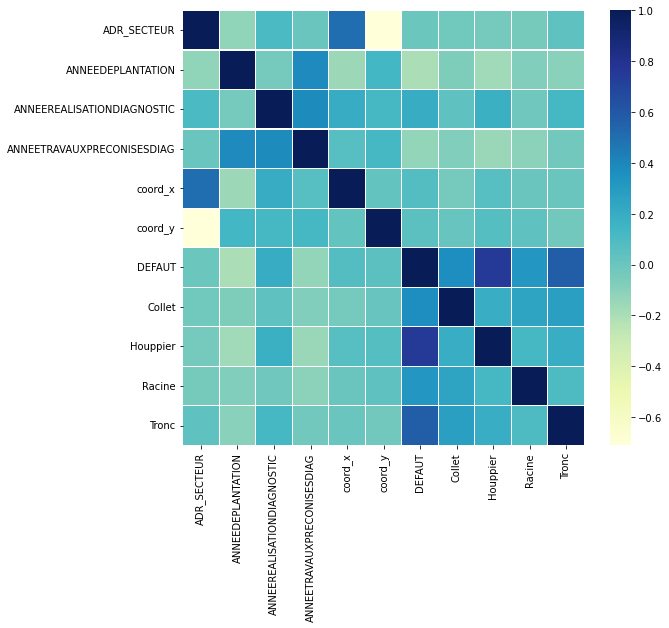

In [10]:
import seaborn as sns
y=data['DEFAUT']
X=data.drop(['DEFAUT','Tronc','Houppier','Racine','Collet'], axis = 1)
import matplotlib
import matplotlib.pyplot as plt
data['DEFAUT'] = data['DEFAUT'].astype(int)
data['Collet'] = data['Collet'].astype(int)
data['Houppier'] = data['Houppier'].astype(int)
data['Racine'] = data['Racine'].astype(int)
data['Tronc'] = data['Tronc'].astype(int)
corrmat = data.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

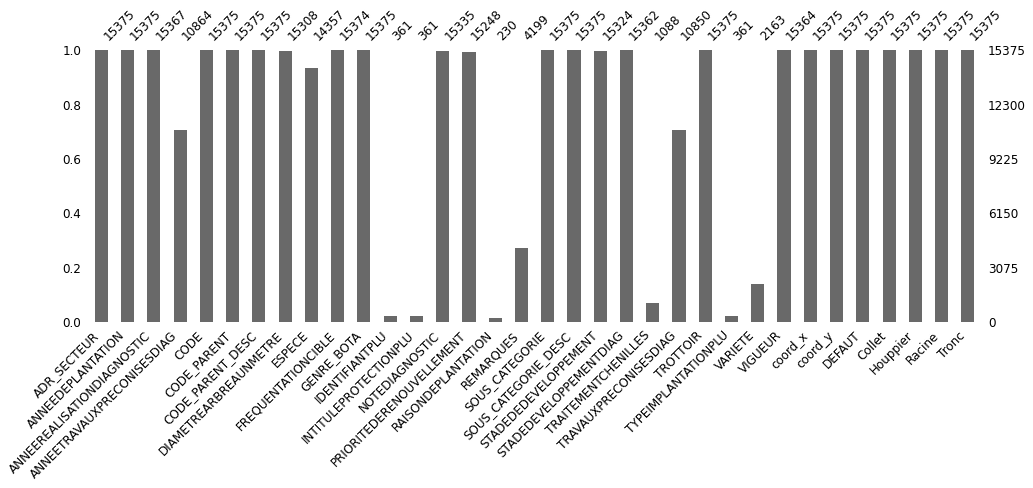

In [11]:
import missingno as mso
plt.figure(1,figsize = (40, 5))
#ax0 = plt.subplot(1,2,1)
ax1 = plt.subplot(1,2,1)
#mso.matrix(data, ax = ax0, sparkline = False, fontsize = 15)
mso.bar(data, ax = ax1, fontsize = 12)
plt.subplots_adjust(wspace = 0.5)

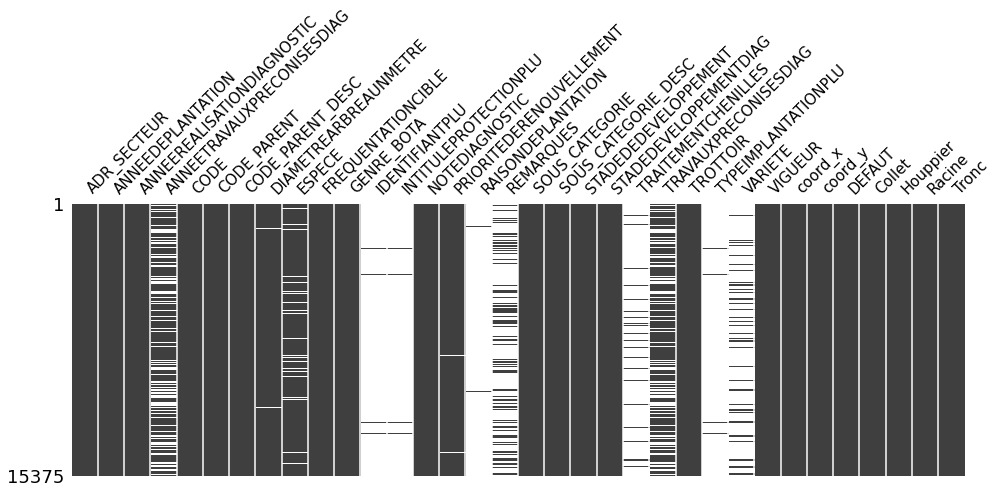

In [12]:
import missingno as mso
plt.figure(1,figsize = (40, 5))
ax0 = plt.subplot(1,2,1)
mso.matrix(data, ax = ax0, sparkline = False, fontsize = 15)
plt.subplots_adjust(wspace = 0.5)

# Dépendance entre Variables Qualitatives et Y ('DEFAUT') :

In [13]:
import sys
sys.executable
!/Users/marwa/Anaconda3/python -m pip install scipy


/bin/bash: /Users/marwa/Anaconda3/python: No such file or directory


In [14]:
import scipy
from scipy import stats

In [15]:
#étudions la dépendance entre RAISONDEPLANTATION et Y :
cont = data[['DEFAUT','RAISONDEPLANTATION']].pivot_table(index='DEFAUT', columns='RAISONDEPLANTATION', aggfunc=len).fillna(0).copy().astype(int)
chi2, p, dof, ex = scipy.stats.chi2_contingency(cont, correction=False)
print(cont)
chi2, p

RAISONDEPLANTATION  Nouveau  Remplacement
DEFAUT                                   
0                       186            44


(0.0, 1.0)

#### Commentaire :
##### Pour un seuil fixé à 1%, il y a indépendance entre RAISONDEPLANTATION et Y

In [16]:
#étudions la dépendance entre TRAITEMENTCHENILLES et Y :
cont3 = data[['DEFAUT','TRAITEMENTCHENILLES']].pivot_table(index='DEFAUT', columns='TRAITEMENTCHENILLES', aggfunc=len).fillna(0).copy().astype(int)
chi2, p, dof, ex = scipy.stats.chi2_contingency(cont3, correction=False)
print(cont3)
chi2, p

TRAITEMENTCHENILLES  Basse  Haute  Moyenne
DEFAUT                                    
0                       52    537      251
1                       16    172       60


(3.052732097687459, 0.21732397882988222)

#### Commentaire :
##### Pour un seuil fixé à 1%, il y a indépendance entre TRAITEMENTCHENILLES et Y

In [17]:
#étudions la dépendance entre VARIETE et Y :
cont5 = data[['DEFAUT','VARIETE']].pivot_table(index='DEFAUT', columns='VARIETE', aggfunc=len).fillna(0).copy().astype(int)
chi2, p, dof, ex = scipy.stats.chi2_contingency(cont5, correction=False)
print(cont5)
chi2, p

VARIETE  Allumi  Ardéchoise  Atropurpurea  ...  Westhoff glorie  Wierii  Yang
DEFAUT                                     ...                               
0             5           1            24  ...                0     118     7
1             3           0            22  ...                1      76     0

[2 rows x 89 columns]


(440.03454799722283, 3.06239047330656e-48)

#### Commentaire :
##### Pour un seuil fixé à 1%, il n'y a pas indépendance entre VARIETE et Y:

In [18]:
#étudions la dépendance entre REMARQUES et Y :
cont6 = data[['DEFAUT','REMARQUES']].pivot_table(index='DEFAUT', columns='REMARQUES', aggfunc=len).fillna(0).copy().astype(int)
chi2, p, dof, ex = scipy.stats.chi2_contingency(cont6, correction=False)
chi2, p

(2771.631233886834, 1.7553254058322405e-56)

#### Commentaire :
##### Pour un seuil fixé à 1%, il n'y a pas indépendance entre REMARQUES et Y:

# Traitement des Valeurs Manquantes :

## 1- Par Suppression :

In [19]:
#Vu que les variables IDENTIFIANTPLU, INTITULEPROTECTIONPLU, TYPEIMPLANTATIONPLU, n'apportent aucune information importante pour détecter un défaut ou non d'un arbre vu qu'elles sont que des identifiants
data = data.drop(['IDENTIFIANTPLU'], axis = 1)
data = data.drop(['INTITULEPROTECTIONPLU'], axis = 1)
data = data.drop(['TYPEIMPLANTATIONPLU'], axis = 1)
#Après l'étude d'indépendance, on décide de supprimer la variables 'TRAITEMENTCHENILLES' et 'RAISONDEPLANTATION'
data = data.drop(['TRAITEMENTCHENILLES'], axis = 1)
data = data.drop(['RAISONDEPLANTATION'], axis = 1)
#ça sert rien les variables collet,houppier,racine,tronc
#data = data.drop(['Collet'], axis = 1)
#data = data.drop(['Houppier'], axis = 1)
#data = data.drop(['Racine'], axis = 1)
#data = data.drop(['Tronc'], axis = 1)
data

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,REMARQUES,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,STADEDEVELOPPEMENTDIAG,TRAVAUXPRECONISESDIAG,TROTTOIR,VARIETE,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014.0,2019.0,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,Alnus,Arbre davenir normal,plus de 20 ans,NaN,ESP151,Arbre de voirie,Arbre jeune,Arbre jeune,Controle,non,NaN,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013.0,NaN,ESP2079,ESP116,Crs Libération Beauvert Alliés,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,Platanus,Arbre davenir normal,plus de 20 ans,NaN,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,non,NaN,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0,0
2,3,2004,NaN,2014.0,ESP26205,ESP635,Pl R Frappat ang Eaux Claires,10 à 20 cm,grandiflora,passages fréquents ou arrêts,Magnolia,Arbre davenir normal,plus de 20 ans,NaN,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre adulte,Controle,oui,NaN,vigoureux,1.913087e+06,4.223524e+06,0,0,0,0,0
3,2,2004,2014.0,2014.0,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,Sophora,Arbre davenir normal,plus de 20 ans,Enormément de grosses branches cassées,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,Taille mise en sécurité,oui,NaN,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013.0,NaN,ESP2547,ESP194,Terminus Tram Esclangon,20 à 30 cm,americana,passages fréquents et arrêts fréquents,Fraxinus,Arbre davenir normal,plus de 20 ans,NaN,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,oui,NaN,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15370,3,2004,2013.0,NaN,ESP29359,ESP84,Hôtel Lesdiguières,0 à 10 cm,NaN,passages fréquents et arrêts fréquents,Pinus,Arbre davenir normal,plus de 20 ans,NaN,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre jeune,NaN,non,NaN,vigoureux,1.912985e+06,4.222215e+06,0,0,0,0,0
15371,4,2004,2014.0,2014.0,ESP12605,ESP1023,R Gén Mangin Alliés Jacquart,40 à 50 cm,acerifolia,passages fréquents et arrêts fréquents,Platanus,Arbre davenir normal,plus de 20 ans,NaN,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,Taille de prolongement,non,NaN,vigoureux,1.913534e+06,4.223000e+06,0,0,0,0,0
15372,1,2004,2013.0,NaN,ESP15840,ESP1277,A DL Weill Arménie à Esclangon,10 à 20 cm,NaN,passages fréquents et arrêts fréquents,Fraxinus,Arbre davenir normal,plus de 20 ans,NaN,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,non,Flame,vigoureux,1.913037e+06,4.225100e+06,0,0,0,0,0
15373,4,2004,2014.0,NaN,ESP1436,ESP877,Av Berthelot arrêt tram MC2,10 à 20 cm,styraciflua,passages fréquents et arrêts fréquents,Liquidambar,Arbre davenir normal,plus de 20 ans,Réseau aérien passant audessus de larbre,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,oui,NaN,vigoureux,1.914695e+06,4.222890e+06,0,0,0,0,0


## 2- Par Imputation :

In [20]:
#traitement des valeurs manquantes de 'VARIETE', 'ESPECE', 'TRAVAUXPRECONISESDIAG' par Methode 1 : 'Most Common Class'
df1 = data[['VARIETE','ESPECE','STADEDEDEVELOPPEMENT','TRAVAUXPRECONISESDIAG','PRIORITEDERENOUVELLEMENT', 'DIAMETREARBREAUNMETRE', 'NOTEDIAGNOSTIC','STADEDEVELOPPEMENTDIAG','ANNEEREALISATIONDIAGNOSTIC','VIGUEUR']]
data_most_common_imputed = df1.apply(lambda x: x.fillna(x.value_counts().index[0]))
print(data_most_common_imputed.isnull().sum())

VARIETE                       0
ESPECE                        0
STADEDEDEVELOPPEMENT          0
TRAVAUXPRECONISESDIAG         0
PRIORITEDERENOUVELLEMENT      0
DIAMETREARBREAUNMETRE         0
NOTEDIAGNOSTIC                0
STADEDEVELOPPEMENTDIAG        0
ANNEEREALISATIONDIAGNOSTIC    0
VIGUEUR                       0
dtype: int64


In [21]:
#traitement des valeurs manquantes de 'REMARQUES' par la création d'une classe 'Rien'
df2 = data[['REMARQUES']]
df2_unknown_imputed = df2.fillna("Rien")
df2_unknown_imputed
print(df2_unknown_imputed.isnull().sum())

REMARQUES    0
dtype: int64


In [22]:
#traitement des valeurs manquantes de 'ANNEETRAVAUXPRECONISESDIAG' par imputation par median
df3 = data[['ANNEETRAVAUXPRECONISESDIAG']]
df3_median_imputed = df3.fillna(df3.median())
df3_median_imputed
print(df3_median_imputed.isnull().sum())

ANNEETRAVAUXPRECONISESDIAG    0
dtype: int64


In [23]:
data[['REMARQUES']]=df2_unknown_imputed
data[['ANNEETRAVAUXPRECONISESDIAG']]=df3_median_imputed
data[['VARIETE','ESPECE','STADEDEDEVELOPPEMENT','TRAVAUXPRECONISESDIAG','PRIORITEDERENOUVELLEMENT', 'DIAMETREARBREAUNMETRE', 'NOTEDIAGNOSTIC','STADEDEVELOPPEMENTDIAG','ANNEEREALISATIONDIAGNOSTIC','VIGUEUR']]=data_most_common_imputed

In [24]:
#Percentage of missing values
totalmissingvalues=data.isnull().sum().sort_values(ascending=False)
Numbermissingvalues=data.isnull().count()
Percentage=totalmissingvalues/Numbermissingvalues*100
Percentagearrondi=round(Percentage,1)#Arrondir le nombre de chiffres après la virgule à 1
Percentagesorted=Percentagearrondi.sort_values(ascending=False)
Percentagesorted

coord_y                       0.0
Houppier                      0.0
ANNEEDEPLANTATION             0.0
ANNEEREALISATIONDIAGNOSTIC    0.0
ANNEETRAVAUXPRECONISESDIAG    0.0
CODE                          0.0
CODE_PARENT                   0.0
CODE_PARENT_DESC              0.0
Collet                        0.0
DEFAUT                        0.0
DIAMETREARBREAUNMETRE         0.0
ESPECE                        0.0
FREQUENTATIONCIBLE            0.0
GENRE_BOTA                    0.0
NOTEDIAGNOSTIC                0.0
coord_x                       0.0
PRIORITEDERENOUVELLEMENT      0.0
REMARQUES                     0.0
Racine                        0.0
SOUS_CATEGORIE                0.0
SOUS_CATEGORIE_DESC           0.0
STADEDEDEVELOPPEMENT          0.0
STADEDEVELOPPEMENTDIAG        0.0
TRAVAUXPRECONISESDIAG         0.0
TROTTOIR                      0.0
Tronc                         0.0
VARIETE                       0.0
VIGUEUR                       0.0
ADR_SECTEUR                   0.0
dtype: float64

In [25]:
#We focus on the feature 'DEFAUT' for the first classification purpose
import seaborn as sns
import matplotlib.pyplot as plt



#Part a :Separate the dataset into 'arbre en défaut' and 'arbre en non défaut'
Defaut = data[data['DEFAUT']==1]
Non_Defaut = data[data['DEFAUT']==0]

In [26]:
Defaut.drop(['DEFAUT'], axis = 1)

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,REMARQUES,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,STADEDEVELOPPEMENTDIAG,TRAVAUXPRECONISESDIAG,TROTTOIR,VARIETE,VIGUEUR,coord_x,coord_y,Collet,Houppier,Racine,Tronc
3,2,2004,2014.0,2014.0,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,Sophora,Arbre davenir normal,plus de 20 ans,Enormément de grosses branches cassées,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,Taille mise en sécurité,oui,Austriaca,vigoureux,1.914187e+06,4.224275e+06,0,1,1,0
5,3,2004,2015.0,2018.0,ESP11866,ESP872,Pc Ch Elysés Ouest,40 à 50 cm,abies,passages fréquents et arrêts fréquents,Picea,Arbre à abattre dans les 5 ans,de 1 à 5 ans,Rien,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre adulte,Controle résistographe,non,Austriaca,vigoureux,1.912600e+06,4.222098e+06,1,0,0,0
7,2,2004,2014.0,2014.0,ESP2708,ESP1311,Jard Hoche pas Est Malraux,30 à 40 cm,nigra,passages fréquents et arrêts fréquents,Populus,Arbre à abattre dans les 10 ans,de 11 à 20 ans,Rien,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre vieillissant,Taille de bois mort,non,Italica,vieillissement dépérissement,1.914403e+06,4.224092e+06,0,1,0,0
9,5,2004,2015.0,2017.0,ESP30323,ESP995,Prc Echangeurs Bastion St Roch,40 à 50 cm,acerifolia,passages fréquents ou arrêts,Acer,Arbre davenir incertain,plus de 20 ans,Rien,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre adulte,Taille de bois mort,non,Austriaca,vigoureux,1.915322e+06,4.224680e+06,0,1,0,0
11,4,2004,2014.0,2014.0,ESP1429,ESP666,Av Champon pair,40 à 50 cm,tomentosa,passages fréquents et arrêts fréquents,Tilia,Arbre davenir normal,plus de 20 ans,Taillé en rideau,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,Taille rideau,oui,Austriaca,vigoureux,1.914626e+06,4.223904e+06,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,6,2004,2015.0,2020.0,ESP14286,ESP1267,Grenoble village av M Reynoard,20 à 30 cm,platanoides,passages fréquents et arrêts fréquents,Acer,Arbre davenir incertain,plus de 20 ans,Rien,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre adulte,Taille cohabitation,non,Austriaca,vigoureux,1.914606e+06,4.221801e+06,1,1,0,0
15361,2,2004,2014.0,2015.0,ESP11448,ESP591,Parc 1 Michalon Musée,80 à 90 cm,nigra,passages fréquents et arrêts fréquents,Populus,Arbre davenir normal,de 11 à 20 ans,Rien,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre adulte,Taille de bois mort,non,Italica,vigueur intermédiaire,1.914774e+06,4.225368e+06,0,1,1,0
15365,2,2006,2015.0,2017.0,ESP16906,ESP495,Cimetière St Roch,60 à 70 cm,acerifolia,passages fréquents et arrêts fréquents,Thuja,Arbre davenir incertain,de 11 à 20 ans,Rien,ESP065,Arbre denceintes fermées,Arbre adulte,Arbre vieillissant,Taille formation et mise au gabarit,non,Austriaca,vigoureux,1.915104e+06,4.225219e+06,0,0,0,1
15366,5,2004,2015.0,2017.0,ESP6304,ESP995,Prc Echangeurs Bastion St Roch,30 à 40 cm,pseudoacacia,passages fréquents ou arrêts,Robinia,Arbre davenir incertain,de 11 à 20 ans,lierre important,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre adulte,Taille formation et mise au gabarit,non,Austriaca,vigoureux,1.915249e+06,4.224691e+06,0,0,0,1


In [27]:
Non_Defaut.drop(['DEFAUT'], axis = 1)

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,REMARQUES,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,STADEDEVELOPPEMENTDIAG,TRAVAUXPRECONISESDIAG,TROTTOIR,VARIETE,VIGUEUR,coord_x,coord_y,Collet,Houppier,Racine,Tronc
0,5,2014,2014.0,2019.0,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,Alnus,Arbre davenir normal,plus de 20 ans,Rien,ESP151,Arbre de voirie,Arbre jeune,Arbre jeune,Controle,non,Austriaca,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0
1,3,2004,2013.0,2017.0,ESP2079,ESP116,Crs Libération Beauvert Alliés,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,Platanus,Arbre davenir normal,plus de 20 ans,Rien,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,Taille formation et mise au gabarit,non,Austriaca,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0
2,3,2004,2015.0,2014.0,ESP26205,ESP635,Pl R Frappat ang Eaux Claires,10 à 20 cm,grandiflora,passages fréquents ou arrêts,Magnolia,Arbre davenir normal,plus de 20 ans,Rien,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre adulte,Controle,oui,Austriaca,vigoureux,1.913087e+06,4.223524e+06,0,0,0,0
4,1,2004,2013.0,2017.0,ESP2547,ESP194,Terminus Tram Esclangon,20 à 30 cm,americana,passages fréquents et arrêts fréquents,Fraxinus,Arbre davenir normal,plus de 20 ans,Rien,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,Taille formation et mise au gabarit,oui,Austriaca,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0
6,6,2004,2013.0,2020.0,ESP5219,ESP1398,Prc La Bruyère accés SUD,30 à 40 cm,excelsior,passages fréquents et arrêts fréquents,Fraxinus,Arbre davenir normal,plus de 20 ans,Rien,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre adulte,Taille de bois mort,non,Austriaca,vigoureux,1.914850e+06,4.222165e+06,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15370,3,2004,2013.0,2017.0,ESP29359,ESP84,Hôtel Lesdiguières,0 à 10 cm,acerifolia,passages fréquents et arrêts fréquents,Pinus,Arbre davenir normal,plus de 20 ans,Rien,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre jeune,Taille formation et mise au gabarit,non,Austriaca,vigoureux,1.912985e+06,4.222215e+06,0,0,0,0
15371,4,2004,2014.0,2014.0,ESP12605,ESP1023,R Gén Mangin Alliés Jacquart,40 à 50 cm,acerifolia,passages fréquents et arrêts fréquents,Platanus,Arbre davenir normal,plus de 20 ans,Rien,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,Taille de prolongement,non,Austriaca,vigoureux,1.913534e+06,4.223000e+06,0,0,0,0
15372,1,2004,2013.0,2017.0,ESP15840,ESP1277,A DL Weill Arménie à Esclangon,10 à 20 cm,acerifolia,passages fréquents et arrêts fréquents,Fraxinus,Arbre davenir normal,plus de 20 ans,Rien,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,Taille formation et mise au gabarit,non,Flame,vigoureux,1.913037e+06,4.225100e+06,0,0,0,0
15373,4,2004,2014.0,2017.0,ESP1436,ESP877,Av Berthelot arrêt tram MC2,10 à 20 cm,styraciflua,passages fréquents et arrêts fréquents,Liquidambar,Arbre davenir normal,plus de 20 ans,Réseau aérien passant audessus de larbre,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,Taille formation et mise au gabarit,oui,Austriaca,vigoureux,1.914695e+06,4.222890e+06,0,0,0,0


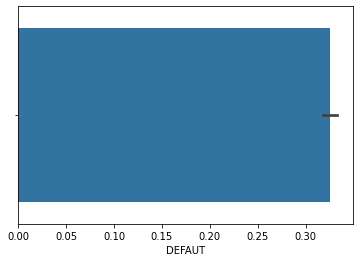

In [28]:
#Question 4 : 
sns.barplot( x='DEFAUT', data=data)


In [29]:
#Convert the categorical data into numerical before classification

from sklearn.preprocessing import LabelEncoder
data=data.apply(LabelEncoder().fit_transform)

data

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,REMARQUES,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,STADEDEVELOPPEMENTDIAG,TRAVAUXPRECONISESDIAG,TROTTOIR,VARIETE,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,4,10,3,7,11792,599,766,1,52,1,5,1,3,1133,1,0,1,1,3,0,4,1,13344,6597,0,0,0,0,0
1,2,0,2,5,5608,143,340,12,1,0,75,1,3,1133,1,0,0,0,12,0,4,1,3566,5231,0,0,0,0,0
2,2,0,4,2,8518,815,609,1,88,1,59,1,3,1133,2,2,0,0,3,1,4,1,2841,9148,0,0,0,0,0
3,1,0,3,2,14208,82,818,13,101,0,94,1,3,583,1,0,0,0,13,1,4,1,6785,10938,1,0,1,1,0
4,0,0,2,5,8145,418,1129,11,6,0,41,1,3,1133,1,0,0,0,12,1,4,1,2355,13847,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15370,2,0,2,5,10186,998,444,0,1,0,73,1,3,1133,2,2,0,1,12,0,4,1,2389,3905,0,0,0,0,0
15371,3,0,3,2,1320,23,835,13,1,0,75,1,3,1133,1,0,0,0,10,0,4,1,4397,7164,0,0,0,0,0
15372,0,0,2,5,3064,241,2,1,1,0,41,1,3,1133,1,0,0,0,12,0,31,1,2649,13374,0,0,0,0,0
15373,3,0,3,5,2213,1029,44,1,197,0,55,1,3,1153,1,0,0,0,12,1,4,1,9298,6833,0,0,0,0,0


In [ ]:
#Trainig

from sklearn.model_selection import train_test_split

x=data.drop('DEFAUT', axis=1)
y=data['DEFAUT']
print(y)


x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.33)

0        0
1        0
2        0
3        1
4        0
        ..
15370    0
15371    0
15372    0
15373    0
15374    0
Name: DEFAUT, Length: 15375, dtype: int64


In [31]:
from sklearn import tree, metrics
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, accuracy_score, \
    f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, \
    cross_val_score, GridSearchCV, ParameterGrid
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, \
    BaggingClassifier, AdaBoostClassifier, \
    GradientBoostingClassifier, \
    VotingClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train, y_train)
y_score = rf.predict(x_test).copy()
accuracy = rf.score(x_test, y_test)
recall = cross_val_score(rf, x_train, y_train, scoring='recall')
precision = cross_val_score(rf, x_train, y_train, scoring='precision')

print('accuracy:',accuracy)
print('F-measure:',f1_score(y_test, y_score, average='weighted'))
print('AUC:', roc_auc_score(y_test, rf.predict_proba(x_test)[:,1]))
print('Recall:', np.mean(recall))
print('Precision:', np.mean(precision))


accuracy: 0.8821442648797793
F-measure: 0.8805350074084892
AUC: 0.9333564238793064
Recall: 0.7530120481927712
Precision: 0.8416842149940262


In [ ]:
#Cross-validation

cv10 = cross_val_score(rf, x, y, cv=10)
recall = cross_val_score(rf, x_train, y_train, cv=10, scoring='recall')
precision = cross_val_score(rf, x_train, y_train, cv=10, scoring='precision')
print('accuracy:',cv10.mean())
print('F-measure:',f1_score(y_test, y_score, average='weighted'))
print('AUC:', roc_auc_score(y_test, rf.predict_proba(x_test)[:,1]))
print('Recall:', np.mean(recall))
print('Precision:', np.mean(precision))


accuracy: 0.885072968214472
F-measure: 0.8805350074084892
AUC: 0.9333564238793064
Recall: 0.7596385542168674
Precision: 0.8379868742551617


In [ ]:
abc = AdaBoostClassifier(tree.DecisionTreeClassifier(), n_estimators=500)
abc.fit(x_train, y_train)
y_score = abc.predict(x_test).copy()
accuracy = abc.score(x_test, y_test)
recall = cross_val_score(abc, x_train, y_train, scoring='recall')
precision = cross_val_score(abc, x_train, y_train, scoring='precision')

print('accuracy:',accuracy)
print('F-measure:',f1_score(y_test, y_score, average='weighted'))
print('AUC:', roc_auc_score(y_test, abc.predict_proba(x_test)[:,1]))
print('Recall:', np.mean(recall))
print('Precision:', np.mean(precision))


accuracy: 0.822230981474182
F-measure: 0.822123635463886
AUC: 0.7987929798428475
Recall: 0.7256024096385543
Precision: 0.7134292565817536


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_score = clf.predict(x_test).copy()
accuracy = clf.score(x_test, y_test)
recall = cross_val_score(clf, x_train, y_train, scoring='recall')
precision = cross_val_score(clf, x_train, y_train, scoring='precision')

print('accuracy:',accuracy)
print('F-measure:',f1_score(y_test, y_score, average='weighted'))
print('AUC:', roc_auc_score(y_test, clf.predict_proba(x_test)[:,1]))
print('Recall:', np.mean(recall))
print('Precision:', np.mean(precision))



accuracy: 0.8257784785179346
F-measure: 0.8254048488473347
AUC: 0.8012954199542642
Recall: 0.7289156626506024
Precision: 0.7153778603714851


In [ ]:
#Cross-validation

cv10 = cross_val_score(clf, x, y, cv=10)
recall = cross_val_score(clf, x_train, y_train, cv=10, scoring='recall')
precision = cross_val_score(clf, x_train, y_train, cv=10, scoring='precision')
print('accuracy:',cv10.mean())
print('F-measure:',f1_score(y_test, y_score, average='weighted'))
print('AUC:', roc_auc_score(y_test, clf.predict_proba(x_test)[:,1]))
print('Recall:', np.mean(recall))
print('Precision:', np.mean(precision))

accuracy: 0.8368775661976408
F-measure: 0.8254048488473347
AUC: 0.8012954199542642
Recall: 0.7186746987951806
Precision: 0.7195348338273706


In [ ]:
#NativeBayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#instanciation
model_Gaussian = GaussianNB()
#training
model_Gaussian.fit(x_train, y_train)
y_score = model_Gaussian.predict(x_test).copy()
accuracy = model_Gaussian.score(x_test, y_test)
recall = cross_val_score(model_Gaussian, x_train, y_train, scoring='recall')
precision = cross_val_score(model_Gaussian, x_train, y_train, scoring='precision')

print('accuracy:',accuracy)
print('F-measure:',f1_score(y_test, y_score, average='weighted'))
print('AUC:', roc_auc_score(y_test, model_Gaussian.predict_proba(x_test)[:,1]))
print('Recall:', np.mean(recall))
print('Precision:', np.mean(precision))

accuracy: 0.8064643279463933
F-measure: 0.8078618072311505
AUC: 0.8479966189970498
Recall: 0.7424698795180723
Precision: 0.6757871894028791


In [ ]:
#Cross-validation

cv10 = cross_val_score(model_Gaussian, x, y, cv=10)
recall = cross_val_score(model_Gaussian, x_train, y_train, cv=10, scoring='recall')
precision = cross_val_score(model_Gaussian, x_train, y_train, cv=10, scoring='precision')
print('accuracy:',cv10.mean())
print('F-measure:',f1_score(y_test, y_score, average='weighted'))
print('AUC:', roc_auc_score(y_test, model_Gaussian.predict_proba(x_test)[:,1]))
print('Recall:', np.mean(recall))
print('Precision:', np.mean(precision))

accuracy: 0.8025346608536887
F-measure: 0.8078618072311505
AUC: 0.8479966189970498
Recall: 0.7424698795180723
Precision: 0.6755982371889735


In [37]:
#Trainig
data = data.drop(['DEFAUT'], axis = 1)


from sklearn.model_selection import train_test_split

x_singlelabel=data.drop(columns=['Racine','Collet','Tronc','Houppier'])
y_multilabel=data[['Collet', 'Houppier', 'Racine', 'Tronc']]
x_train, x_test, y_train, y_test = train_test_split(x_singlelabel, y_multilabel, test_size=0.25, random_state=42)

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,roc_auc_score


categories = list(y_multilabel.columns.values)
SVM_pipeline = Pipeline([('SVM', OneVsRestClassifier(SVC(C=1,kernel='rbf',gamma=0.001), n_jobs=-1)),])


for category in categories:
    print('*Processing {} comments...*'.format(category))
    SVM_pipeline.fit(x_train, y_train[category])
    
    # calculating test accuracy
    prediction = SVM_pipeline.predict(x_test)
    #print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))
    #print("\n")
    
    # calculating test recall
    #print('Test recall is {}'.format(recall_score(y_test[category], prediction,average='micro')))
    #print("\n")
    
    #calculating test precision
    #print('Test precision is {}'.format(precision_score(y_test[category], prediction,average='micro')))
    #print("\n")

    #calculating test f-measure
    #print('Test F-measure is {}'.format(f1_score(y_test[category], prediction,average='micro')))
    #print("\n")

    #calculating test AUC
    print('Test AUC is {}'.format(roc_auc_score(y_test[category], prediction,average='micro')))
    print("\n")


*Processing Collet comments...*
Test AUC is 0.5


*Processing Houppier comments...*
Test AUC is 0.49983530961791833


*Processing Racine comments...*
Test AUC is 0.5


*Processing Tronc comments...*
Test AUC is 0.5




In [58]:

categories = list(y_multilabel.columns.values)
rf_pipeline = Pipeline([('rf', OneVsRestClassifier(RandomForestClassifier(n_estimators=500),n_jobs=-1),)])


for category in categories:
    print('*Processing {} comments...*'.format(category))
    rf_pipeline.fit(x_train, y_train[category])
    
    # calculating test accuracy
    prediction = rf_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))
    print("\n")
    
    # calculating test recall
    #print('Test recall is {}'.format(recall_score(y_test[category], prediction,average='micro')))
    #print("\n")
    
    #calculating test precision
    #print('Test precision is {}'.format(precision_score(y_test[category], prediction,average='micro')))
    #print("\n")

    #calculating test f-measure
    #print('Test F-measure is {}'.format(f1_score(y_test[category], prediction,average='micro')))
    #print("\n")

    #calculating test AUC
    #print('Test AUC is {}'.format(roc_auc_score(y_test[category], prediction,average='micro')))
    #print("\n")



*Processing Collet comments...*
Test accuracy is 0.9438085327783559


*Processing Houppier comments...*
Test accuracy is 0.8928199791883454


*Processing Racine comments...*
Test accuracy is 0.9560353798126952


*Processing Tronc comments...*
Test accuracy is 0.8920395421436004




In [62]:
categories = list(y_multilabel.columns.values)
abc_pipeline = Pipeline([('abc', OneVsRestClassifier(AdaBoostClassifier(tree.DecisionTreeClassifier(), n_estimators=500),n_jobs=-1),)])


for category in categories:
    print('*Processing {} comments...*'.format(category))
    abc_pipeline.fit(x_train, y_train[category])
    
    # calculating test accuracy
    prediction = abc_pipeline.predict(x_test)
    #print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))
    #print("\n")
    
    # calculating test recall
    #print('Test recall is {}'.format(recall_score(y_test[category], prediction,average='micro')))
    #print("\n")
    
    #calculating test precision
    print('Test precision is {}'.format(precision_score(y_test[category], prediction,average='micro')))
    print("\n")

    #calculating test f-measure
    #print('Test F-measure is {}'.format(f1_score(y_test[category], prediction,average='micro')))
    #print("\n")

    #calculating test AUC
    #print('Test AUC is {}'.format(roc_auc_score(y_test[category], prediction,average='micro')))
    #print("\n")





*Processing Collet comments...*
Test precision is 0.9175338189386056


*Processing Houppier comments...*
Test precision is 0.8514568158168574


*Processing Racine comments...*
Test precision is 0.9308012486992716


*Processing Tronc comments...*
Test precision is 0.8504162330905307




In [63]:
from sklearn.tree import DecisionTreeClassifier
categories = list(y_multilabel.columns.values)
clf_pipeline = Pipeline([('clf', OneVsRestClassifier(DecisionTreeClassifier(),n_jobs=-1),)])


for category in categories:
    print('*Processing {} comments...*'.format(category))
    clf_pipeline.fit(x_train, y_train[category])
    
    # calculating test accuracy
    prediction = clf_pipeline.predict(x_test)
    #print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))
    #print("\n")
    
    # calculating test recall
    #print('Test recall is {}'.format(recall_score(y_test[category], prediction,average='micro')))
    #print("\n")
    
    #calculating test precision
    print('Test precision is {}'.format(precision_score(y_test[category], prediction,average='micro')))
    print("\n")

    #calculating test f-measure
    #print('Test F-measure is {}'.format(f1_score(y_test[category], prediction,average='micro')))
    #print("\n")

    #calculating test AUC
    #print('Test AUC is {}'.format(roc_auc_score(y_test[category], prediction,average='micro')))
    #print("\n")

*Processing Collet comments...*
Test precision is 0.9190946930280958


*Processing Houppier comments...*
Test precision is 0.8553590010405827


*Processing Racine comments...*
Test precision is 0.9367845993756504


*Processing Tronc comments...*
Test precision is 0.8519771071800208




In [64]:
from sklearn.naive_bayes import GaussianNB

categories = list(y_multilabel.columns.values)
nb_pipeline = Pipeline([('nb', OneVsRestClassifier(GaussianNB(),n_jobs=-1),)])


for category in categories:
    print('*Processing {} comments...*'.format(category))
    nb_pipeline.fit(x_train, y_train[category])
    
    # calculating test accuracy
    prediction = nb_pipeline.predict(x_test)
    #print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))
    #print("\n")
    
    # calculating test recall
    #print('Test recall is {}'.format(recall_score(y_test[category], prediction,average='micro')))
    #print("\n")
    
    #calculating test precision
    print('Test precision is {}'.format(precision_score(y_test[category], prediction,average='micro')))
    print("\n")

    #calculating test f-measure
    #print('Test F-measure is {}'.format(f1_score(y_test[category], prediction,average='micro')))
    #print("\n")

    #calculating test AUC
    #print('Test AUC is {}'.format(roc_auc_score(y_test[category], prediction,average='micro')))
    #print("\n")


*Processing Collet comments...*
Test precision is 0.9014047866805411


*Processing Houppier comments...*
Test precision is 0.7890218522372529


*Processing Racine comments...*
Test precision is 0.8678459937565036


*Processing Tronc comments...*
Test precision is 0.8210197710718002




In [72]:
#Cross-validation


categories = list(y_multilabel.columns.values)
rf_pipeline = Pipeline([('rf', OneVsRestClassifier(RandomForestClassifier(n_estimators=500),n_jobs=-1),)])




for category in categories:
    print('*Processing {} comments...*'.format(category))
    rf_pipeline.fit(x_train, y_train[category])
    cv10 = cross_val_score(rf_pipeline, x_singlelabel, y_multilabel, cv=2).mean()
    
    # calculating test accuracy
    prediction = rf_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))
    #print("\n")
    
    # calculating test recall
    #print('Test recall is {}'.format(recall_score(y_test[category], prediction,average='micro')))
    #print("\n")
    
    #calculating test precision
    #print('Test precision is {}'.format(precision_score(y_test[category], prediction,average='micro')))
    #print("\n")

    #calculating test f-measure
    #print('Test F-measure is {}'.format(f1_score(y_test[category], prediction,average='micro')))
    #print("\n")

    #calculating test AUC
    #print('Test AUC is {}'.format(roc_auc_score(y_test[category], prediction,average='micro')))
    #print("\n")

*Processing Collet comments...*
Test accuracy is 0.9432882414151925
*Processing Houppier comments...*
Test accuracy is 0.8912591050988553
*Processing Racine comments...*
Test accuracy is 0.9568158168574402
*Processing Tronc comments...*
Test accuracy is 0.8928199791883454
